In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.cross_validation import train_test_split

datadir = './PAMAP2_Dataset/'

list_file = ['Protocol/subject101.dat',\
             'Protocol/subject102.dat',\
             'Protocol/subject103.dat',\
             'Protocol/subject104.dat',\
             'Protocol/subject105.dat',\
             'Protocol/subject106.dat',\
             'Protocol/subject107.dat',\
             'Protocol/subject108.dat',\
             'Protocol/subject109.dat']

###################################################################################
# Selecting the features from the data sets 
# that are going to be used in the analysis.
#
# Correspondence between column index and feature 
#
# 1 : activity
# 2 : heart rate
# 3 : hand temp
# 4,5,6 : 3D acceleration measured at hand, 16g scale
# 10,11,12 : gyroscopic data
#
features = [0,1,2,3,4,5,6,10,11,12]
data_labels = ['time',
               'activity', 
               'heart_rate', 
               'hand_temp',
               'ac_16g_x',
               'ac_16g_y',
               'ac_16g_z',
               'g_x',
               'g_y',
               'g_z']

# Load first data file and initialize dataframe

isubject = 1
df = pd.read_table(datadir+list_file[0],header=None,delim_whitespace=True)
#
print 'Done reading data file ', datadir+list_file[0]
#
df = df[features].dropna()
df.columns = data_labels
df.loc[:,'subject'] = isubject
df.loc[:,'intensity'] = df['activity'][:]
df1=df

# Load remaining data files and concatenate with initial dataframe
for lfile in list_file[1:]:
    datafile = datadir+lfile
    isubject = isubject + 1
    print 'Done reading data file ', datafile
    df = pd.read_table(datafile,header=None,delim_whitespace=True)
    df = df[features].dropna()
    df.columns = data_labels
    df.loc[:,'subject'] = isubject
    df.loc[:,'intensity'] = df['activity'][:]
    df1 = pd.concat([df1,df])

Done reading data file  ./PAMAP2_Dataset/Protocol/subject101.dat
Done reading data file  ./PAMAP2_Dataset/Protocol/subject102.dat
Done reading data file  ./PAMAP2_Dataset/Protocol/subject103.dat
Done reading data file  ./PAMAP2_Dataset/Protocol/subject104.dat
Done reading data file  ./PAMAP2_Dataset/Protocol/subject105.dat
Done reading data file  ./PAMAP2_Dataset/Protocol/subject106.dat
Done reading data file  ./PAMAP2_Dataset/Protocol/subject107.dat
Done reading data file  ./PAMAP2_Dataset/Protocol/subject108.dat
Done reading data file  ./PAMAP2_Dataset/Protocol/subject109.dat


In [2]:
# Visual inspection of dataframe
pd.set_option('display.max_rows', 100)
df1

,time,activity,heart_rate,hand_temp,ac_16g_x,ac_16g_y,ac_16g_z,g_x,g_y,g_z,subject,intensity
0,8.38,0,104,30.0000,2.372230,8.600740,3.510480,-0.092217,0.056812,-0.015845,1,0
10,8.48,0,104,30.0000,2.297450,8.904500,3.469840,-0.015370,-0.065894,-0.026322,1,0
21,8.59,0,104,30.0000,2.408670,9.168190,3.355160,0.032015,0.017456,-0.006301,1,0
32,8.70,0,104,30.0000,2.181140,8.866760,3.391250,0.073080,0.038494,0.002435,1,0
43,8.81,0,104,30.0000,2.406810,8.713260,3.395150,-0.080054,0.025991,-0.019187,1,0
54,8.92,0,104,30.0000,2.261260,8.943070,3.507660,0.014198,0.021693,0.006973,1,0
65,9.03,0,104,30.0000,2.331500,8.751780,3.393890,-0.211851,-0.027887,-0.038524,1,0
76,9.14,0,104,30.0000,2.410820,8.903620,3.471540,-0.045503,-0.034956,-0.037416,1,0
87,9.25,0,105,30.0000,2.182750,8.336960,3.547010,0.395593,0.076996,-0.020520,1,0
98,9.36,0,105,30.0000,2.593350,8.938430,3.281720,0.360160,-0.013527,0.024559,1,0


In [3]:
#####################################################################
# Create the dataframe that will be used to generate the machine
# learning model.
#
# Retain for analysis the rows where the activity index is different 
# than zero. Index zero corresponds to transient activity times in 
# the observations that should be discarded in the analysis.
#
df_analysis = df1[df1.activity != 0][:]

#####################################################################
#
# Relabel types of activities in terms of a label that specifies
# the intensity of that activity.
#
# Labels specifying activity intensities
target_labels = ['minimum','low','medium','high']
#
#
######################################################################
# Dictionary for the assign the activity intensity level
# to each of the 24 activities recorded
# 
conversion_dict = {'minimum':[1,2,3,9,10,11,18],
                   'low': [17,13,19],
                   'medium': [4,12,16],
                   'high':[5,6,7,20,24]}

for tl in target_labels:
    lact = conversion_dict[tl]
    for iactivity in lact:       
        df_analysis.loc[df_analysis['activity'] == iactivity,'intensity']=tl

In [4]:
# Inspection of analysis dataframe
#
df_analysis

,time,activity,heart_rate,hand_temp,ac_16g_x,ac_16g_y,ac_16g_z,g_x,g_y,g_z,subject,intensity
2932,37.70,1,100,30.3750,2.301060,7.258570,6.092590,-0.069961,-0.018328,0.004582,1,minimum
2943,37.81,1,100,30.3750,2.246150,7.481800,5.552190,-0.431227,0.002685,-0.062964,1,minimum
2954,37.92,1,100,30.3750,2.300000,7.106810,6.093090,0.075692,-0.030792,0.005246,1,minimum
2965,38.03,1,100,30.3750,2.494550,7.523350,6.171570,-0.259058,-0.267895,-0.038533,1,minimum
2976,38.14,1,101,30.3750,2.716540,8.305960,4.786710,0.377115,-0.023688,-0.020670,1,minimum
2987,38.25,1,101,30.3750,2.549540,7.631220,5.556230,-0.487667,-0.019958,-0.089500,1,minimum
2998,38.36,1,101,30.3750,2.824070,6.144900,5.065020,-0.781563,0.198873,-0.213285,1,minimum
3009,38.47,1,101,30.3750,2.736260,7.941950,6.520170,-0.472414,0.279868,0.036526,1,minimum
3020,38.58,1,101,30.3750,2.388940,7.488300,6.401030,0.358279,1.046610,0.346204,1,minimum
3031,38.69,1,101,30.3750,1.813200,6.856390,7.356720,0.360442,1.287300,0.129226,1,minimum


In [5]:
df_analysis.loc[:,'ac_16g_norm']=df_analysis[['ac_16g_x','ac_16g_y','ac_16g_z']].apply(lambda x: np.linalg.norm(x), axis=1)

In [6]:
#####################################################################
#
# Prepare dataframe for machine learning analys
#
# * Extract one data row every five to build the model
# * Shuffle the data rows in the machine learning dataframe  
#

df_ml = df_analysis[::5].sample(frac=1,random_state=32047)
df_ml

,time,activity,heart_rate,hand_temp,ac_16g_x,ac_16g_y,ac_16g_z,g_x,g_y,g_z,subject,intensity,ac_16g_norm
324838,3254.27,7,124,30.7500,-4.376610,-13.869800,0.868048,0.407312,0.149447,-1.448570,8,high,14.569817
231710,2325.48,4,119,33.3125,-6.715870,2.615090,0.815883,0.085481,-0.881348,3.026180,1,medium,7.253087
17677,182.66,1,69,33.3750,4.926610,-0.255756,8.197100,0.010456,-0.021786,-0.020383,6,minimum,9.567097
75847,764.18,3,106,33.2500,-7.041600,6.740850,3.645150,-0.842050,0.080696,0.115514,4,minimum,10.407224
109188,1097.59,17,99,33.6250,0.149794,8.364410,4.825040,-1.029270,2.102720,1.220330,4,low,9.657474
334386,3349.75,7,128,30.8125,-5.857250,-9.835940,0.909235,0.695950,0.321342,-1.344830,8,high,11.483893
57887,584.51,2,71,31.8125,-0.539649,3.246030,8.873160,-0.115558,0.394377,0.138471,3,minimum,9.463662
194330,1949.00,12,147,34.6250,-8.665800,4.082980,2.013320,-0.844539,1.591960,-0.388898,5,medium,9.788783
252758,2533.47,4,96,31.6250,-10.123700,5.329790,4.373490,0.817755,0.070974,-0.083720,6,medium,12.248403
95034,958.72,17,97,33.3125,1.538910,3.711360,3.360540,0.712251,2.327650,0.447331,1,low,5.237907


In [7]:
##################################################################### 
# Prepare the target labels
#
intesity_labels = df_ml['intensity']
# 
# Extract the unique labels
labels = list(set(intesity_labels))
print "Unique intensity labels : ", labels

# Prepare the array of labels for the machine learning data set
target_labels = np.array([labels.index(x) for x in intesity_labels])

# Prepare the array of target features for the machine learning data set
target_features = df_ml[['hand_temp','heart_rate','ac_16g_x','ac_16g_y','ac_16g_z','g_x','g_y','g_z']].as_matrix()

Unique intensity labels :  ['high', 'medium', 'minimum', 'low']


In [8]:
print 'Number of data points and features in the machine learning dataset :', np.shape(target_features)



Number of data points and features in the machine learning dataset : (35280, 8)


In [9]:
# Prepare train and test set for the machine learning step
X = target_features
y = target_labels

# Here I am using 20 % of the data set for test and 80 % for training the model
X_train, X_test, \
y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=33646)

In [10]:
#
# Initialize the support vector machine classifier
#
my_kernel = 'rbf'
classifier = svm.SVC(kernel=my_kernel,tol=0.0005,verbose=True)
classifier.fit(X_train, y_train)

[LibSVM]

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.0005, verbose=True)

In [11]:
# Run the ML model on the test set and determine prediction accuracy
#
results = classifier.predict(X_test)
result_select = (results == y_test)


y_correct = y_test[result_select]
X_correct = X_test[result_select,:]
num_correct = (results == y_test).sum()

recall = float(num_correct) / float(len(y_test))

print "model accuracy (%): ", recall * float(100), "%"

model accuracy (%):  87.074829932 %


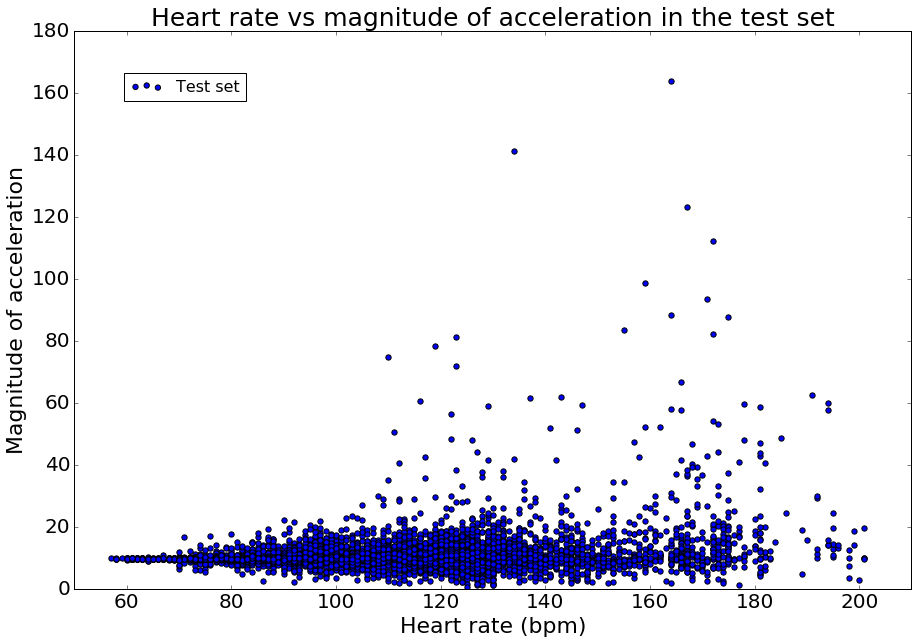

In [14]:
#########################################################################
# Plot of data set
#
# Here I plot the heart rate vs. the magnitude of acceleration vector for
# the points in the ML test set
#

fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(111,)

ax1.set_title('Heart rate vs magnitude of acceleration in the test set',fontsize=25)
ax1.set_xlabel('Heart rate (bpm)',fontsize=22)
ax1.set_ylabel('Magnitude of acceleration',fontsize=22)
#ax1.set_xticklabels(fontsize=12)
ax1.tick_params(labelsize=20)

#
# Prepare x and y data to plot
#
x_heart_rate_test = X_test[:,1]
y_acc_mag_test = np.linalg.norm(X_test[:,2:5],axis=1)

ax1.scatter(x_heart_rate_test,y_acc_mag_test, s=28, label='Test set')


lgd = plt.legend(loc='center left', bbox_to_anchor=(0.05, 0.90),fontsize = 16)
ax1.set_ylim(0,180)
ax1.set_xlim(50,210)

#txt = plt.text(55,120,'\nClassification model:\nSVM with radial basis functions.\n\nModel accuracy ='+ "{:.2f}".format(recall * float(100))+ ' %', fontsize = 16)
plt.savefig('plot1.jpg',dpi=300,bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

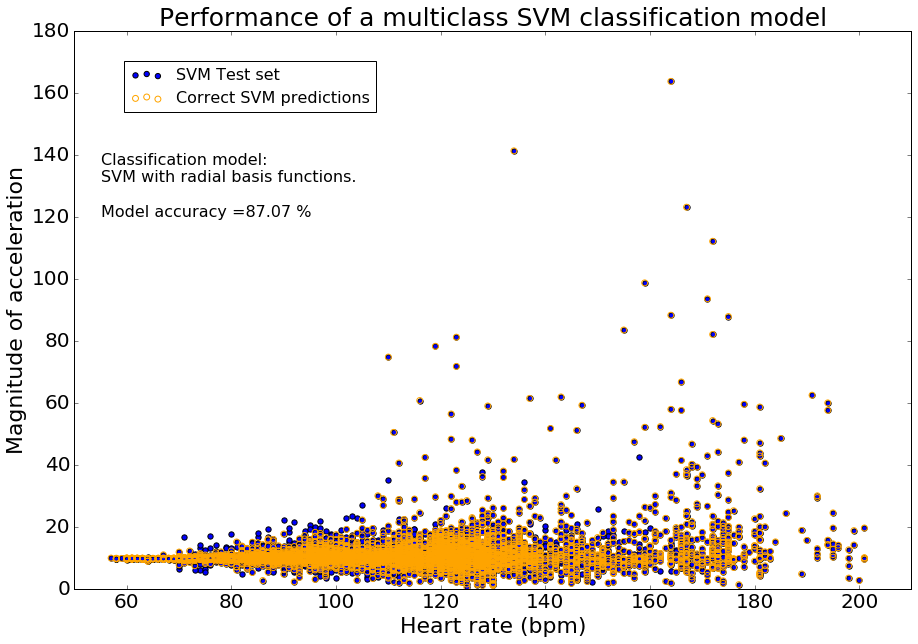

In [15]:
#########################################################################
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(111,)

ax1.set_title('Performance of a multiclass SVM classification model',fontsize=25)

ax1.set_xlabel('Heart rate (bpm)',fontsize=22)
ax1.set_ylabel('Magnitude of acceleration',fontsize=22)
#ax1.set_xticklabels(fontsize=12)
ax1.tick_params(labelsize=20)


#
# Prepare x and y data to plot
#
x_heart_rate_test = X_test[:,1]
x_heart_rate_correct = X_correct[:,1]

y_acc_mag_test = np.linalg.norm(X_test[:,2:5],axis=1)
y_acc_mag_correct = np.linalg.norm(X_correct[:,2:5],axis=1)

ax1.scatter(x_heart_rate_test,y_acc_mag_test, s=28, label='SVM Test set')
ax1.scatter(x_heart_rate_correct,y_acc_mag_correct,linewidth = 1., facecolors='none',\
           edgecolor='orange', s=35,label='Correct SVM predictions')

#ax1.scatter(X_test[:,1],np.linalg.norm(X_test[:,2:5],axis=1), s=23, label='SVM Test set')
#ax1.scatter(X_correct[:,1],np.linalg.norm(X_correct[:,2:5],axis=1),linewidth = 0.9, facecolors='none',\
#           edgecolor='orange', s=30,label='Correct SVM predictions')


lgd = plt.legend(loc='center left', bbox_to_anchor=(0.05, 0.90),fontsize = 16)
ax1.set_ylim(0,180)
ax1.set_xlim(50,210)

txt = plt.text(55,120,'\nClassification model:\nSVM with radial basis functions.\n\nModel accuracy ='+ "{:.2f}".format(recall * float(100))+ ' %', fontsize = 16)
plt.savefig('plot2.jpg',dpi=300,bbox_extra_artists=(lgd,txt), bbox_inches='tight')
plt.show()